In [1]:
# !pip install datasets

In [147]:
from datasets import load_dataset
import numpy as np

from bpemb import BPEmb

In [148]:
# Load the English tokenizer.
bpemb_qu = BPEmb(lang="qu")
bpemb_es = BPEmb(lang="es")

In [149]:
ds_qu_sp = load_dataset("pollitoconpapass/cuzco-quechua-translation-spanish",split='train')

In [150]:
ds_qu_sp

Dataset({
    features: ['spa', 'quz'],
    num_rows: 106432
})

In [5]:
import unicodedata

def remove_accents_preserve_n(text: str) -> str:
    """
    Remove accents while preserving 'ñ' character.

    Args:
        text (str): Input text
    Returns:
        str: Text with accents removed but 'ñ' preserved

    Examples:
        >>> remove_accents_preserve_n("áéíóúñÁÉÍÓÚÑ")
        'aeiouñAEIOUN'
        >>> remove_accents_preserve_n("El niño está en la montaña")
        'El niño esta en la montaña'
    """
    # First, save all 'ñ' and 'Ñ' positions and characters
    n_positions = [(i, c) for i, c in enumerate(text) if c in 'ñÑ']

    # Decompose unicode characters into their base form and combining characters
    normalized = unicodedata.normalize('NFKD', text)

    # Remove combining characters (accents) except keep base characters
    result = ''.join(c for c in normalized if not unicodedata.combining(c))

    # Convert result to list for easier character replacement
    result_list = list(result)

    # Restore 'ñ' and 'Ñ' in their original positions
    for pos, char in n_positions:
        result_list[pos] = char

    return ''.join(result_list)

In [6]:
ds_qu_sp['train']['spa'][:1]

['PRESENTACION. Este trabajo, un pequeño texto trata sobre los diferentes acontecimientos, anécdotas experiencias, conocimientos, trabajos y profesiones de los integrantes de la promoción “DEFENDIENDO NUESTRO IDIOMA QUECHUA” y que trata sobre el objetivo de dar a conocer el avance y/o nivel de aprendizaje de la parte académica, gramática, escritura y el habla de los estudiantes del 8vo CICLO de la Academia Mayor de la Lengua Quechua (AMLQ) con el propósito de dar a conocer al mundo entero nuestro idioma EL QUECHUA. Este texto también analiza como la crisis del COVID-19 está generando cambios en diferentes acontecimientos, trabajos y que haceres cotidianos, el RUNA SIMI ya traspaso el mundo entero heredando valores, costumbres y sabidurías ancestrales del cual debemos de sentirnos orgullosos, por la importancia de aprender, enseñar, investigar y preservar nuestro patrimonio cultural vivo EL QUECHUA.']

In [7]:
ds_qu_sp['train']['quz'][0:1]

['REQSICHIY SIMI. Kay llank’anaqa, imaymanan willakuykunamantan, yachaykunamantan, reqsiykunamantan, llank’anakunamantan, kamauqkunamanta chaninchan noqayku kayku “QHESWA SIMINCHISTA AMACHASPA” qankunaman  reqsichiyku noqaykuq yachayniykuta llank’ayniykuta llapan yachasqaykumanta rimayniykupi, qelqayniykupi ñataq pusaq t’aqa kayku chayqa QHESWA SIMI HAMUT’ANA KURAQ SUNTUR WASIMANTA noqayku teqsimuyuntinman reqsichiyta munayku.  Kay llank’anaykupas imaynatan COVID -19 onqoy imaymana llank’aykunata, ruwaykunata t’ijrapushan, qheswa siminchis teqsimuyuntinman qhapaq yachayta, chanin kausayta, ñaupa yachaykunata mast’arishan chayrayku noqanchis hauka  kananchis, QHESWA SIMINCHISTA kausaq qhapaq yachayninchista k’uskirinanchis, yachachinanchis, k’uskirinanchis, kallpacharinanchis.']

In [132]:
sentence_spa = [remove_accents_preserve_n(sentence.lower()) for sentence in ds_qu_sp['train']['spa']]
sentence_quz = [remove_accents_preserve_n(sentence.lower()) for sentence in ds_qu_sp['train']['quz']]

In [133]:
# sentence_spa = [sentence.lower() for sentence in ds_qu_sp['train']['spa']]
# sentence_quz = [sentence.lower() for sentence in ds_qu_sp['train']['quz']]

In [134]:
# sentence_spa = [remove_accents_preserve_n(sentence.lower()) for sentence in ds1['train']['es']]
# sentence_quz = [remove_accents_preserve_n(sentence.lower()) for sentence in ds1['train']['qu']]

In [65]:
len(sentence_spa)

106432

In [66]:
bpemb_vocab_size_qu, bpemb_embed_size_qu = bpemb_qu.vectors.shape
print("Vocabulary size:", bpemb_vocab_size_qu)
print("Embedding size:", bpemb_embed_size_qu)
bpemb_vocab_size_es, bpemb_embed_size_es = bpemb_es.vectors.shape
print("Vocabulary size:", bpemb_vocab_size_es)
print("Embedding size:", bpemb_embed_size_es)

Vocabulary size: 10000
Embedding size: 100
Vocabulary size: 10000
Embedding size: 100


In [67]:

START_TOKEN = '<START>'
PADDING_TOKEN = '<PADDING>'
END_TOKEN = '<END>'

quechua_vocabulary = [START_TOKEN, ' ', '!', '"', '”','’','“', '#', '$', '%', '&', "'",'‘', '(', ')', '*', '+', ',', '-', '.', '/',
                        '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
                        ':', '<', '=', '>', '?', '¿', '@',
                        'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L',
                        'M', 'N', 'Ñ', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X',
                        'Y', 'Z',
                        '[', '\\', ']', '^', '_', '`',
                        'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l',
                        'm', 'n', 'ñ', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x',
                        'y', 'z',
                        '{', '|', '}', '~', PADDING_TOKEN, END_TOKEN]

spanish_vocabulary = [START_TOKEN, ' ', '!', '"', '”','’','“', '#', '$', '%', '&', "'",'‘', '(', ')', '*', '+', ',', '-', '.', '/',
                        '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
                        ':', '<', '=', '>', '?', '¿', '@',
                        'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L',
                        'M', 'N', 'Ñ', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X',
                        'Y', 'Z',
                        '[', '\\', ']', '^', '_', '`',
                        'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l',
                        'm', 'n', 'ñ', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x',
                        'y', 'z',
                        '{', '|', '}', '~', PADDING_TOKEN, END_TOKEN]

In [68]:
len(spanish_vocabulary)*3

312

In [69]:
PERCENTILE = 95
print( f"{PERCENTILE}th percentile length Kannada: {np.percentile([len(x) for x in sentence_quz], PERCENTILE)}" )
print( f"{PERCENTILE}th percentile length spanish: {np.percentile([len(x) for x in sentence_spa], PERCENTILE)}" )

95th percentile length Kannada: 200.0
95th percentile length spanish: 204.0


In [70]:
y = [len(x) for x in sentence_quz]

In [71]:
len(y)

106432

In [72]:
y = [e for e in y if 240>e>00]

In [73]:
len(y)


103423

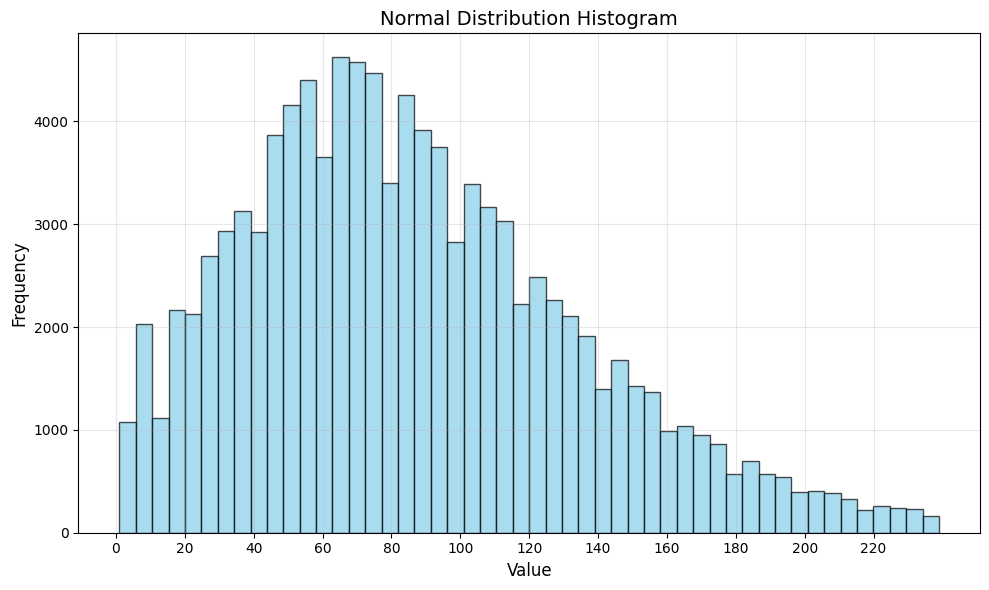

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data
data = np.array(y)

# Create the figure and axis
plt.figure(figsize=(10, 6))

# Plot histogram
plt.hist(data, bins=50, edgecolor='black', alpha=0.7, color='skyblue')

# Customize the plot
plt.title('Normal Distribution Histogram', fontsize=14)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3)

# Add some padding to the layout
plt.xticks(np.arange(0, 240, 20))
plt.tight_layout()

# Show the plot
plt.show()

In [75]:
PERCENTILE = 97
print( f"{PERCENTILE}th percentile length Kannada: {np.max([len(x) for x in sentence_quz])}" )
print( f"{PERCENTILE}th percentile length spanish: {np.max([len(x) for x in sentence_spa])}" )

97th percentile length Kannada: 14806
97th percentile length spanish: 14037


In [76]:
# One-liner solution
max_index = max(enumerate(sentence_quz), key=lambda x: len(x[1]))[0]
max_length = len(sentence_quz[max_index])

print(f"Max length: {max_length}")
print(f"Index: {max_index}")
print(f"Word: {sentence_quz[max_index]}")

Max length: 14806
Index: 1215
Word:   kusisamiyoqmi ch'uya kawsaypi puriqkunaqa, señor diospa yachachisqan simiman hina puriqkunaqa.  kusisamiyoqmi kamachikusqan simikunata hunt'aqkunaqa, señor diosta tukuy sonqo serviqkunaqa.  kusisamiyoqmi señor diospa ñanninkunapi puriqkunaqa ima mana chanintapas mana ruwaqkunaqa.  qanmi unancharqanki kamachikuyniykikunaqa allin waqaychasqapuni kananpaq.  maytan munani qaqa sayayta unanchasqa simiykikunata kasunaypaq.  chaypachan mana imamantapas p'enqakusaqchu llapa kamachikuyniykikunata sonqoypi hap'ispa.  cheqaq sonqowanmi yupaychasqayki chayasqa chaninchasqaykikunata yachaspa.  kamachikusqaykikunatan hunt'asaq. ¡amapuni saqerpariwaychu!  ¿imaynatan waynaqa ch'uyata kawsanqa? simiykiman hina purispanmi ch'uyata kawsanqa.  tukuy sonqoywanmi maskhayki, ama munaychu kamachikuyniykikunamanta t'aqakunayta.  simiykikunatan sonqoypi waqaychashani, ama qan contra huchallikunaypaq.  señor diosniy, ñoqan saminchayki, unanchasqa simiykikunata yachachiway.  

In [136]:
spanish_vocabulary =  bpemb_es.emb.index_to_key
quechua_vocabulary =  bpemb_qu.emb.index_to_key

In [137]:
print(len(spanish_vocabulary))
print(len(quechua_vocabulary))

10000
10000


In [139]:
index_to_quechua = {k:v for k,v in enumerate(quechua_vocabulary)}
quechua_to_index = {v:k for k,v in enumerate(quechua_vocabulary)}
index_to_spanish = {k:v for k,v in enumerate(spanish_vocabulary)}
spanish_to_index = {v:k for k,v in enumerate(spanish_vocabulary)}

In [140]:
sentence_quz[:2]

['reqsichiy simi. kay llank’anaqa, imaymanan willakuykunamantan, yachaykunamantan, reqsiykunamantan, llank’anakunamantan, kamauqkunamanta chaninchan noqayku kayku “qheswa siminchista amachaspa” qankunaman  reqsichiyku noqaykuq yachayniykuta llank’ayniykuta llapan yachasqaykumanta rimayniykupi, qelqayniykupi ñataq pusaq t’aqa kayku chayqa qheswa simi hamut’ana kuraq suntur wasimanta noqayku teqsimuyuntinman reqsichiyta munayku.  kay llank’anaykupas imaynatan covid -19 onqoy imaymana llank’aykunata, ruwaykunata t’ijrapushan, qheswa siminchis teqsimuyuntinman qhapaq yachayta, chanin kausayta, ñaupa yachaykunata mast’arishan chayrayku noqanchis hauka  kananchis, qheswa siminchista kausaq qhapaq yachayninchista k’uskirinanchis, yachachinanchis, k’uskirinanchis, kallpacharinanchis.',
 'santiago sayaq pacha kausayninpa willakuynin kay iskay pachaj wata sutichasqapi, peru suyunchis qespi kausayninta iskay pachaj watanta yuyarinchis.  santiago sayanchis, chunka p’unchaypi intiraymi killapi raym

In [141]:
sentence_spa[:2]

['presentacion. este trabajo, un pequeño texto trata sobre los diferentes acontecimientos, anecdotas experiencias, conocimientos, trabajos y profesiones de los integrantes de la promocion “defendiendo nuestro idioma quechua” y que trata sobre el objetivo de dar a conocer el avance y/o nivel de aprendizaje de la parte academica, gramatica, escritura y el habla de los estudiantes del 8vo ciclo de la academia mayor de la lengua quechua (amlq) con el proposito de dar a conocer al mundo entero nuestro idioma el quechua. este texto tambien analiza como la crisis del covid-19 esta generando cambios en diferentes acontecimientos, trabajos y que haceres cotidianos, el runa simi ya traspaso el mundo entero heredando valores, costumbres y sabidurias ancestrales del cual debemos de sentirnos orgullosos, por la importancia de aprender, enseñar, investigar y preservar nuestro patrimonio cultural vivo el quechua.',
 'reseña historica del     distrito de santiago.   en el bicentenario del peru: 200 añ

In [ ]:
# max_sequence_length = 200
# min_sequence_length = 20

# def is_valid_tokens(sentence, vocab):
#     for token in list(set(sentence)):
#         if token not in vocab:
#             return False
#     return True

# def is_valid_length(sentence, max_sequence_length, min_sequence_length):
#     return (min_sequence_length - 1) < len(list(sentence)) < (max_sequence_length - 1) # need to re-add the end token so leaving 1 space

# valid_sentence_indicies = []
# for index in range(len(sentence_quz)):
#     sentence_quz_, sentence_spa_ = sentence_quz[index], sentence_spa[index]
#     if is_valid_length(sentence_quz_, max_sequence_length, min_sequence_length) \
#       and is_valid_length(sentence_spa_, max_sequence_length,min_sequence_length) \
#       and is_valid_tokens(sentence_quz_, quechua_vocabulary) \
#       and is_valid_tokens(sentence_spa_, spanish_vocabulary) :
#         valid_sentence_indicies.append(index)

# print(f"Number of sentences: {len(sentence_spa)}")
# print(f"Number of valid sentences: {len(valid_sentence_indicies)}")

Number of sentences: 106432
Number of valid sentences: 0


In [142]:
max_sequence_length = 200
min_sequence_length = 20

def is_valid_tokens(sentence, vocab):
    for token in list(set(sentence)):
        if token not in vocab:
            return False
    return True

def is_valid_length(sentence, max_sequence_length, min_sequence_length):
    return (min_sequence_length - 1) < len(list(sentence)) < (max_sequence_length - 1) # need to re-add the end token so leaving 1 space

valid_sentence_indicies = []
for index in range(len(sentence_quz)):
    sentence_quz_, sentence_spa_ = sentence_quz[index], sentence_spa[index]
    if is_valid_length(sentence_quz_, max_sequence_length, min_sequence_length) \
      and is_valid_length(sentence_spa_, max_sequence_length,min_sequence_length):
        valid_sentence_indicies.append(index)

print(f"Number of sentences: {len(sentence_spa)}")
print(f"Number of valid sentences: {len(valid_sentence_indicies)}")

Number of sentences: 106432
Number of valid sentences: 91464


In [143]:
sentence_quz = [sentence_quz[i] for i in valid_sentence_indicies]
sentence_spa = [sentence_spa[i] for i in valid_sentence_indicies]

In [144]:
len(sentence_spa)

91464

In [145]:
from transformer import Transformer # this is the transformer.py file
import torch
import numpy as np

In [146]:
import torch

d_model = 512
batch_size = 48
ffn_hidden = 2048
num_heads = 8
drop_prob = 0.1
num_layers = 2
max_sequence_length = 200
kn_vocab_size = len(sentence_quz)

transformer = Transformer(d_model,
                          ffn_hidden,
                          num_heads,
                          drop_prob,
                          num_layers,
                          max_sequence_length,
                          kn_vocab_size,
                          spanish_to_index,
                          quechua_to_index,
                          START_TOKEN,
                          END_TOKEN,
                          PADDING_TOKEN)

In [42]:
from torch.utils.data import Dataset, DataLoader

class TextDataset(Dataset):

    def __init__(self, sentence_spa, sentence_quz):
        self.sentence_spa = sentence_spa
        self.sentence_quz = sentence_quz

    def __len__(self):
        return len(self.sentence_spa)

    def __getitem__(self, idx):
        return self.sentence_spa[idx], self.sentence_quz[idx]

In [43]:
dataset = TextDataset(sentence_spa, sentence_quz)

In [44]:
len(dataset)

83389

In [45]:
dataset[1]

('acercamiento de niños hispanohablantes al idioma quechua erqekunaq castillanuman quechuasimita achhunku',
 'acercamiento de niños hispanohablantes al idioma quechua erqekunaq castillanuman quechuasimita achhunku')

In [46]:
train_loader = DataLoader(dataset, batch_size)
iterator = iter(train_loader)

In [47]:
for batch_num, batch in enumerate(iterator):
    print(batch)
    if batch_num > 3:
        break

[('ahora estoy estudiando en la universidad andina. alli estoy estudiando para ser medico. cuando termine mi carrera voy a ayudar a todas las personas curando sus enfermedades.', 'acercamiento de niños hispanohablantes al idioma quechua erqekunaq castillanuman quechuasimita achhunku', 'imasmari, imasmari tiene 8 patas y camina por las paredes  imasmari, imasmari es jugueton y dice guau!!  imasmari, imasmari es suave, razga con sus patitas y dice miau!!', 'fuentes: 2021 “el arte del “away” curso virtual mosqoy  ashli akins  2018-2021 experiencia propia gerente del programa de tejidos cusi saco mosqoy peru', 'el aporte del telefono celular en el florecimiento del idioma quechua y su difusion masiva.', 'tambien en el cusco, en las radios emisoras y en la television estan hablando el idioma quechua. deseo que el idioma quechua sea hablado, respetado, valorado y difundido por todo el mundo. gracias.', 'mujer montera pollera chaqueta cutuna phalica manta pequeña faja trencillas', 'traje varo

In [48]:
from torch import nn

criterian = nn.CrossEntropyLoss(ignore_index=quechua_to_index[PADDING_TOKEN],
                                reduction='none')

# When computing the loss, we are ignoring cases when the label is the padding token
for params in transformer.parameters():
    if params.dim() > 1:
        nn.init.xavier_uniform_(params)

optim = torch.optim.Adam(transformer.parameters(), lr=1e-4)
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [49]:
NEG_INFTY = -1e9

def create_masks(eng_batch, kn_batch):
    num_sentences = len(eng_batch)
    look_ahead_mask = torch.full([max_sequence_length, max_sequence_length] , True)
    look_ahead_mask = torch.triu(look_ahead_mask, diagonal=1)
    encoder_padding_mask = torch.full([num_sentences, max_sequence_length, max_sequence_length] , False)
    decoder_padding_mask_self_attention = torch.full([num_sentences, max_sequence_length, max_sequence_length] , False)
    decoder_padding_mask_cross_attention = torch.full([num_sentences, max_sequence_length, max_sequence_length] , False)

    for idx in range(num_sentences):
      eng_sentence_length, kn_sentence_length = len(eng_batch[idx]), len(kn_batch[idx])
      eng_chars_to_padding_mask = np.arange(eng_sentence_length + 1, max_sequence_length)
      kn_chars_to_padding_mask = np.arange(kn_sentence_length + 1, max_sequence_length)
      encoder_padding_mask[idx, :, eng_chars_to_padding_mask] = True
      encoder_padding_mask[idx, eng_chars_to_padding_mask, :] = True
      decoder_padding_mask_self_attention[idx, :, kn_chars_to_padding_mask] = True
      decoder_padding_mask_self_attention[idx, kn_chars_to_padding_mask, :] = True
      decoder_padding_mask_cross_attention[idx, :, eng_chars_to_padding_mask] = True
      decoder_padding_mask_cross_attention[idx, kn_chars_to_padding_mask, :] = True

    encoder_self_attention_mask = torch.where(encoder_padding_mask, NEG_INFTY, 0)
    decoder_self_attention_mask =  torch.where(look_ahead_mask + decoder_padding_mask_self_attention, NEG_INFTY, 0)
    decoder_cross_attention_mask = torch.where(decoder_padding_mask_cross_attention, NEG_INFTY, 0)
    return encoder_self_attention_mask, decoder_self_attention_mask, decoder_cross_attention_mask

In [52]:
transformer.train()

transformer.to(device)
total_loss = 0
num_epochs = 30

for epoch in range(num_epochs):
    print(f"Epoch {epoch}")
    iterator = iter(train_loader)
    for batch_num, batch in enumerate(iterator):
        transformer.train()
        eng_batch, kn_batch = batch
        encoder_self_attention_mask, decoder_self_attention_mask, decoder_cross_attention_mask = create_masks(eng_batch, kn_batch)
        optim.zero_grad()
        kn_predictions = transformer(eng_batch,
                                     kn_batch,
                                     encoder_self_attention_mask.to(device),
                                     decoder_self_attention_mask.to(device),
                                     decoder_cross_attention_mask.to(device),
                                     enc_start_token=False,
                                     enc_end_token=False,
                                     dec_start_token=True,
                                     dec_end_token=True)
        labels = transformer.decoder.sentence_embedding.batch_tokenize(kn_batch, start_token=False, end_token=True)
        loss = criterian(
            kn_predictions.view(-1, kn_vocab_size).to(device),
            labels.view(-1).to(device)
        ).to(device)
        valid_indicies = torch.where(labels.view(-1) == quechua_to_index[PADDING_TOKEN], False, True)
        loss = loss.sum() / valid_indicies.sum()
        loss.backward()
        optim.step()
        #train_losses.append(loss.item())
        if batch_num % 96 == 0:
            print(f"Iteration {batch_num} : {loss.item()}")
            print(f"Español: {eng_batch[0]}")
            print(f"quechua Translation: {kn_batch[0]}")
            kn_sentence_predicted = torch.argmax(kn_predictions[0], axis=1)
            predicted_sentence = ""
            for idx in kn_sentence_predicted:
              if idx == quechua_to_index[END_TOKEN]:
                break
              # print(idx.item())

              predicted_sentence += index_to_quechua[idx.item()]

              # if idx.item() in index_to_quechua:
              #   predicted_sentence += index_to_quechua[idx.item()]
              # else:
              #   # You can choose to ignore the unknown token or replace it with a special token
              #   predicted_sentence += "<UNK>" # Replace with unknown token placeholder
              #   # Alternatively, you could skip this token:
              #   # pass

            print(f"quechua Prediction: {predicted_sentence}")

            transformer.eval()
            kn_sentence = ("",)
            spa_sentence = ("me gusta el pan con queso",)
            for word_counter in range(max_sequence_length):
                encoder_self_attention_mask, decoder_self_attention_mask, decoder_cross_attention_mask= create_masks(spa_sentence, kn_sentence)
                predictions = transformer(spa_sentence,
                                          kn_sentence,
                                          encoder_self_attention_mask.to(device),
                                          decoder_self_attention_mask.to(device),
                                          decoder_cross_attention_mask.to(device),
                                          enc_start_token=False,
                                          enc_end_token=False,
                                          dec_start_token=True,
                                          dec_end_token=False)
                next_token_prob_distribution = predictions[0][word_counter] # not actual probs
                next_token_index = torch.argmax(next_token_prob_distribution).item()
                next_token = index_to_quechua[next_token_index]
                kn_sentence = (kn_sentence[0] + next_token, )
                if next_token == END_TOKEN:
                  break

            print(f"Evaluation translation ({spa_sentence} / Quesoyuq tanta gustan) : {kn_sentence}")
            print("-------------------------------------------")

Epoch 0
Iteration 0 : 10.852348327636719
Español: ahora estoy estudiando en la universidad andina. alli estoy estudiando para ser medico. cuando termine mi carrera voy a ayudar a todas las personas curando sus enfermedades.
quechua Translation: kunanqa hatun yachay wasi suntur andinapi yachashani, chaypin noqa hanpikamayuq kanaypaq yachashani. tukuruspataq llapan runa masikunata, onqoqkunata hanpispa yanapasaq.
quechua Prediction: aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa
Evaluation translation (('me gusta el pan con queso',) / Quesoyuq tanta gustan) : ('aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa',)
-------------------------------------------
Iteration 96 : 3.368618488311767

In [53]:
# Method 1: Save only the model state dict (recommended for most cases)
torch.save(transformer.state_dict(), 'models\model_state12.pth')

# Method 2: Save the entire model
torch.save(transformer, 'models\entire_model12.pth')

In [54]:
print(transformer.state_dict().keys())

odict_keys(['encoder.sentence_embedding.embedding.weight', 'encoder.layers.0.attention.qkv_layer.weight', 'encoder.layers.0.attention.qkv_layer.bias', 'encoder.layers.0.attention.linear_layer.weight', 'encoder.layers.0.attention.linear_layer.bias', 'encoder.layers.0.norm1.gamma', 'encoder.layers.0.norm1.beta', 'encoder.layers.0.ffn.linear1.weight', 'encoder.layers.0.ffn.linear1.bias', 'encoder.layers.0.ffn.linear2.weight', 'encoder.layers.0.ffn.linear2.bias', 'encoder.layers.0.norm2.gamma', 'encoder.layers.0.norm2.beta', 'encoder.layers.1.attention.qkv_layer.weight', 'encoder.layers.1.attention.qkv_layer.bias', 'encoder.layers.1.attention.linear_layer.weight', 'encoder.layers.1.attention.linear_layer.bias', 'encoder.layers.1.norm1.gamma', 'encoder.layers.1.norm1.beta', 'encoder.layers.1.ffn.linear1.weight', 'encoder.layers.1.ffn.linear1.bias', 'encoder.layers.1.ffn.linear2.weight', 'encoder.layers.1.ffn.linear2.bias', 'encoder.layers.1.norm2.gamma', 'encoder.layers.1.norm2.beta', 'deco

In [55]:
transformer.eval()
def translate(eng_sentence):
  eng_sentence = (eng_sentence,)
  kn_sentence = ("",)
  for word_counter in range(max_sequence_length):
    encoder_self_attention_mask, decoder_self_attention_mask, decoder_cross_attention_mask= create_masks(eng_sentence, kn_sentence)
    predictions = transformer(eng_sentence,
                              kn_sentence,
                              encoder_self_attention_mask.to(device),
                              decoder_self_attention_mask.to(device),
                              decoder_cross_attention_mask.to(device),
                              enc_start_token=False,
                              enc_end_token=False,
                              dec_start_token=True,
                              dec_end_token=False)
    next_token_prob_distribution = predictions[0][word_counter]
    next_token_index = torch.argmax(next_token_prob_distribution).item()
    next_token = index_to_quechua[next_token_index]
    kn_sentence = (kn_sentence[0] + next_token, )
    if next_token == END_TOKEN:
      break
  return kn_sentence[0]

In [56]:
transformer

Transformer(
  (encoder): Encoder(
    (sentence_embedding): SentenceEmbedding(
      (embedding): Embedding(104, 512)
      (position_encoder): PositionalEncoding()
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): SequentialEncoder(
      (0): EncoderLayer(
        (attention): MultiHeadAttention(
          (qkv_layer): Linear(in_features=512, out_features=1536, bias=True)
          (linear_layer): Linear(in_features=512, out_features=512, bias=True)
        )
        (norm1): LayerNormalization()
        (dropout1): Dropout(p=0.1, inplace=False)
        (ffn): PositionwiseFeedForward(
          (linear1): Linear(in_features=512, out_features=2048, bias=True)
          (linear2): Linear(in_features=2048, out_features=512, bias=True)
          (relu): ReLU()
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (norm2): LayerNormalization()
        (dropout2): Dropout(p=0.1, inplace=False)
      )
      (1): EncoderLayer(
        (attention): MultiHeadA

In [57]:
translation = translate("quiero volar contigo")
print(translation)
# Qanwan kuska phawayta munani

¿imatan ruwana ruwananchis?<END>


In [58]:
translation = translate("comer mucho")
print(translation)
# achkata mikuy

¿imaraykun jesus mana manchakuq kasqanta?<END>


In [ ]:
translation = translate("lectura de la biblia")
print(translation)
# biblia ñawinchay

chaymi paykuna hina kasqanku<END>
